# First Regression Model with Advertising Dataset

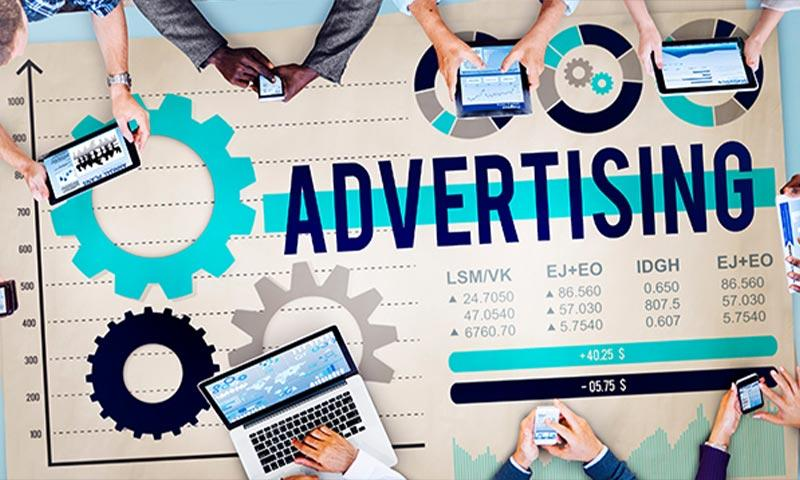

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

In [2]:
# Load the data
advertising=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\Advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# shape of dataset
advertising.shape

(200, 4)

In [4]:
# information about dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#Describe of dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# find ot null value in dataset
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# index of dataset
advertising.index

RangeIndex(start=0, stop=200, step=1)

In [8]:
 # Dtypes of dataset
advertising.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

##  Visualization

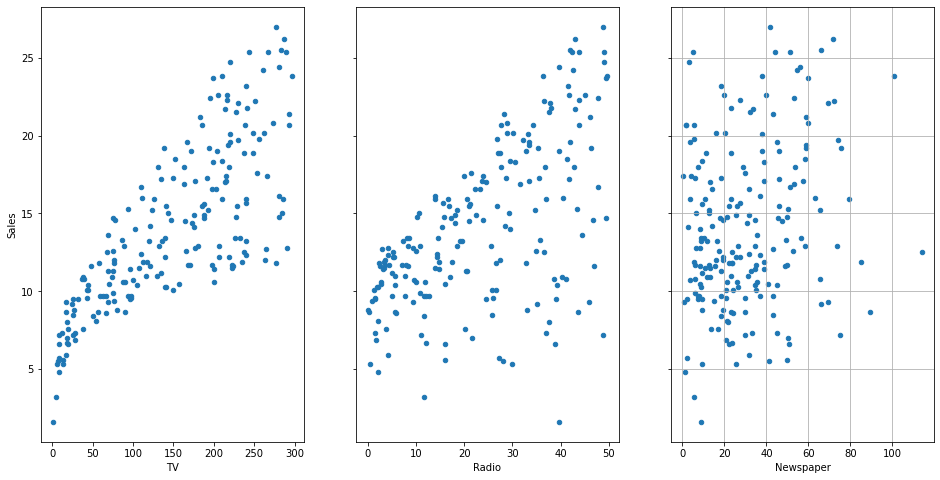

In [10]:
fig,axs=plt.subplots(1,3,sharey=True)
advertising.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
advertising.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
advertising.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])
plt.grid(True)
plt.show()

## Splitting Dataset to Train and Test Set

In [12]:
feature_cols=['TV']
X=advertising[feature_cols]
y=advertising.Sales

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [15]:
lm.fit(X,y)

LinearRegression()

In [16]:
print(lm.intercept_)

7.032593549127693


In [18]:
print(lm.coef_)

[0.04753664]


In [19]:
7.032593549127693+0.04753664*50

9.409425549127693

In [21]:
X_new=pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [23]:
pred=lm.predict(X_new)
pred

array([9.40942557])

C:\Users\Pranav\.continuum\ppp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


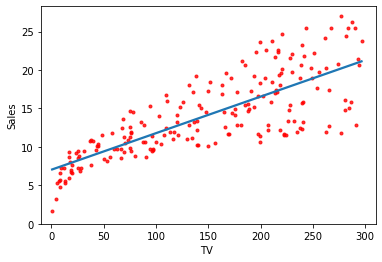

In [37]:
g = sns.regplot(advertising["TV"], advertising["Sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_ylabel("Sales")
g.set_xlabel("TV ")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [32]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales ~ TV',data=advertising).fit()

In [33]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [34]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [35]:
lm.rsquared

0.611875050850071